In [2]:
import cv2
import numpy as np
import torch
from generate_mask_only import gen_mask_only
from IPython.display import display
from PIL import Image
from pipeline_text_diffuser_sd15 import StableDiffusionPipeline
from t_diffusers.unet_2d_condition import UNet2DConditionModel

from diffusers import DDPMScheduler
from hi_sam.text_segmentation import make_text_segmentation_args


td_ckpt = "GoGiants1/td-unet15"


unet = UNet2DConditionModel.from_pretrained(
    td_ckpt,
    subfolder="unet",
)

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    unet=unet,
    torch_dtype=torch.float32,
)
pipe.load_ip_adapter(
    "h94/IP-Adapter",
    subfolder=[
        "models",
    ],
    weight_name=[
        "ip-adapter_sd15.safetensors",
    ],
)
pipe.set_ip_adapter_scale(0.4)


input_image = Image.open("./assets/original_input.jpeg").convert("RGB").resize((512, 512))


""" Change the text in the original image by coordinates and  """

sample_text="bear"
# for original_input.jpeg. 110, 500에서 가장 가까운 mask의 글자를 바꾼다.
coordinates=[[110, 500]] 

arg_textseg = make_text_segmentation_args(
    model_type='vit_h',
    checkpoint_path='sam_tss_h_textseg.pth',
    input_size=(512, 512),
    hier_det=False,
)

arg_maskgen = make_text_segmentation_args(
    model_type='vit_h',
    checkpoint_path='word_detection_totaltext.pth',
    input_size=(512, 512),
    hier_det=True,
)

out = gen_mask_only(input_image, sample_text=sample_text, choice_list=coordinates, arg_textseg=arg_textseg, arg_maskgen=arg_maskgen)
out.save(f"./assets/mask_1_out.png") # for debugging
text_mask_image = cv2.cvtColor(np.array(out), cv2.COLOR_RGB2BGR)

pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config)
generator = torch.Generator(device="cuda").manual_seed(42)
pipe.to("cuda")
output = pipe(
    prompt="a cat with a sign board 'bear bear bear'",
    input_image=input_image,
    text_mask_image=text_mask_image,
    ip_adapter_image = input_image,
    width=512,
    height=512,
    guidance_scale=7,
    generator=generator,
).images[0]


/home/s2/mlvu25/anaconda3/envs/tf/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

sam_tss_h_textseg.pth:   0%|          | 0.00/232M [00:00<?, ?B/s]

Freeze image encoder.
<All keys matched successfully>
Freeze image encoder.
<All keys matched successfully>


/home/s2/mlvu25/anaconda3/envs/tf/lib/python3.10/site-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/s2/mlvu25/anaconda3/envs/tf/lib/python3.10/site-packages/torch/utils/checkpoint.py:91: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


Mask shape:  (512, 512)
latent shape torch.Size([1, 4, 64, 64])
prompt_embeds shape or enc hidden state torch.Size([2, 77, 768])
feature_mask shape torch.Size([1, 1, 64, 64])
masked_feature shape torch.Size([1, 4, 64, 64])
segmentation_mask shape torch.Size([1, 1, 256, 256])


  0%|          | 0/50 [00:00<?, ?it/s]

torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77, 768])
torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77, 768])
torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77, 768])
torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77, 768])
torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77, 768])
torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77, 768])
torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77, 768])
torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77, 768])
torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77, 768])
torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77, 768])
torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77, 768])
torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77, 768])
torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77, 768])
torch.Size([2, 9, 64, 64])
IP-Adapter here!  2 torch.Size([2, 77

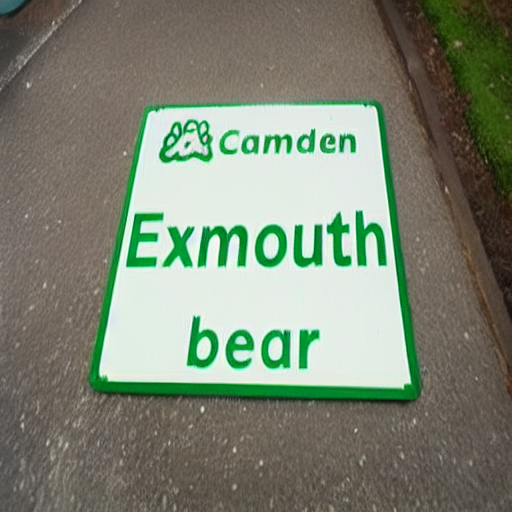

In [3]:
display(output)